# problem - 1

### Problem Statement: -

A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models. 


In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the data
df = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day30-Simple LinearReg\Datasets_SLR\calories_consumed.csv")
df
#calories consumed is the target variable

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [4]:
#creating dictonary
df.rename(columns = {'Weight gained (grams)' :'Weight_gained',
                                'Calories Consumed' : 'Calories_Consumed'},inplace = True)

In [5]:
#data cleaning
#check null values
df.isnull().sum()

Weight_gained        0
Calories_Consumed    0
dtype: int64

In [6]:
#eda or statistical analysis
df.describe()

,Weight_gained,Calories_Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


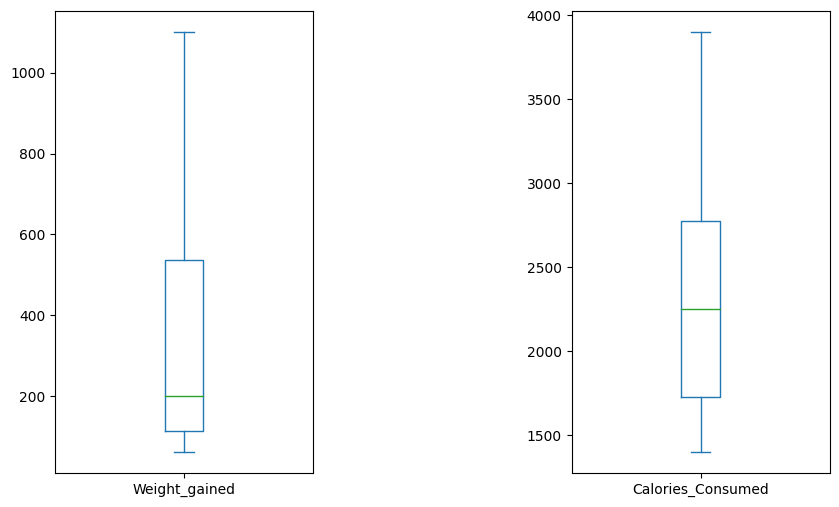

In [7]:
#uivariate anlysis
##check for outliers
df.plot(kind='box',subplots=True,sharey=False,figsize=(10,6))
plt.subplots_adjust(wspace=1)
plt.show()

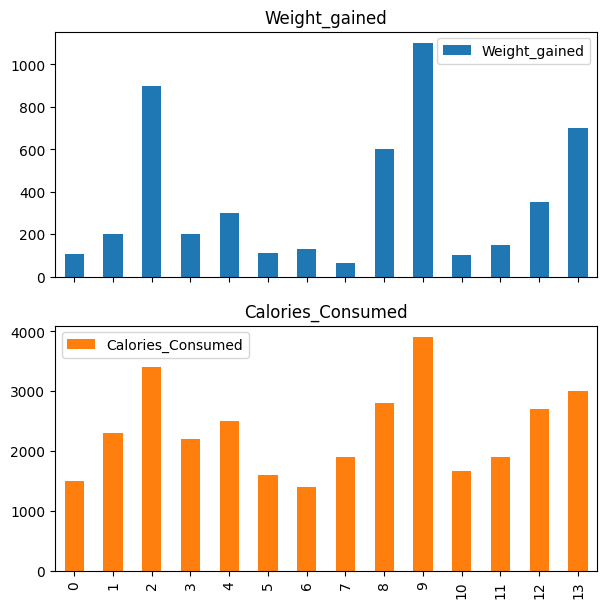

In [8]:
df.plot(kind='bar',subplots=True,sharey=False,figsize=(7,7))
plt.subplots_adjust(wspace=1)
plt.show()

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <BarContainer object of 10 artists>)

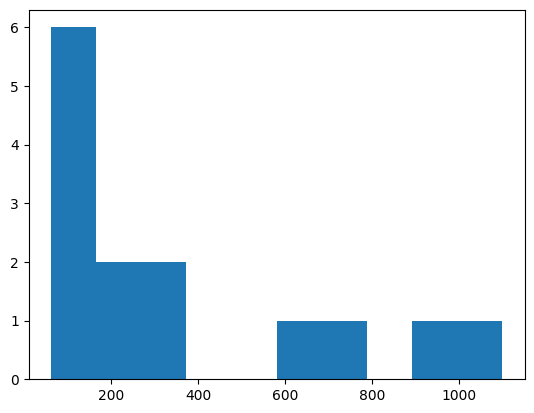

In [9]:
#histogram
plt.hist(df['Weight_gained'])

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <BarContainer object of 10 artists>)

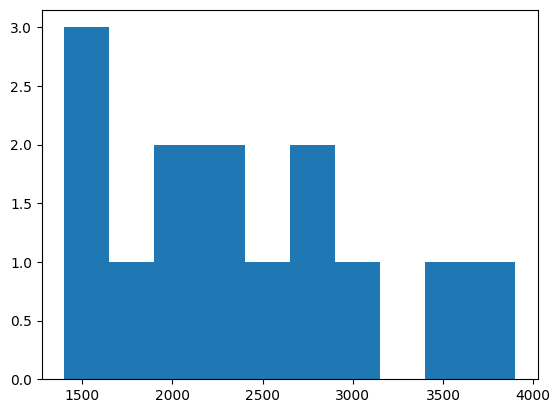

In [10]:
plt.hist(df.Calories_Consumed)

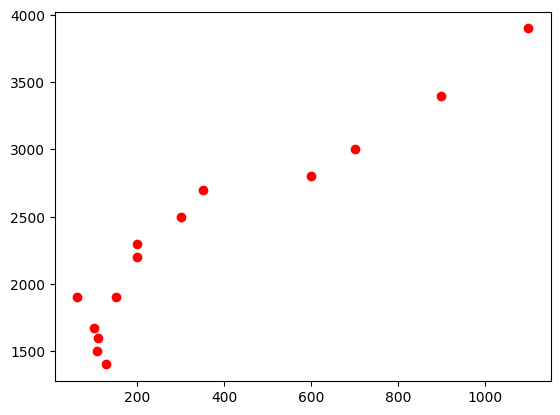

In [11]:
#bivariate anlysis
#scatter plot

plt.scatter(x=df.Weight_gained,y=df.Calories_Consumed, color='red')

In [12]:
#check correlation matrix - to check the strength of variation b/w two variables

np.corrcoef(df.Weight_gained, df.Calories_Consumed)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [13]:
cov_output = np.cov(df.Weight_gained,df.Calories_Consumed)[0,1]
cov_output

237669.4505494506

<AxesSubplot: >

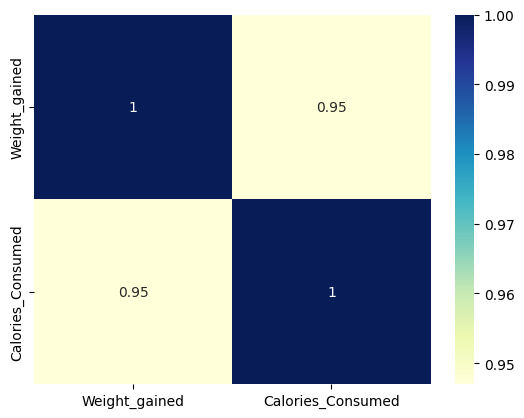

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [15]:
#feature  engineering
#Normalization or scaling of data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.04431599, 0.04      ],
       [0.13294798, 0.36      ],
       [0.80732177, 0.8       ],
       [0.13294798, 0.32      ],
       [0.22928709, 0.44      ],
       [0.04624277, 0.08      ],
       [0.06358382, 0.        ],
       [0.        , 0.2       ],
       [0.51830443, 0.56      ],
       [1.        , 1.        ],
       [0.03660886, 0.108     ],
       [0.08477842, 0.2       ],
       [0.27745665, 0.52      ],
       [0.61464355, 0.64      ]])

In [17]:
#convertibg data back into pandas dataframe 
my_scaled_data = pd.DataFrame(scaled_data)
my_scaled_data.columns=['Weight_gained', 'Calories_Consumed']

In [18]:
#linear tregression using stats model package
import statsmodels.formula.api as smf

In [19]:
#simple linear regression

model1 = smf.ols("Calories_Consumed ~ Weight_gained",data= df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_Consumed   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           2.86e-07
Time:                        23:13:03   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1577.2007    100.541     15.687      0.000    1358.141    1796.260
Weight_gained     2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred1 = model1.predict(pd.DataFrame(df['Weight_gained']))
pred1

0     1807.718381
1     2004.085294
2     3498.181364
3     2004.085294
4     2217.527589
5     1811.987227
6     1850.406841
7     1709.534925
8     2857.854477
9     3925.065955
10    1790.642998
11    1897.364146
12    2324.248737
13    3071.296772
dtype: float64

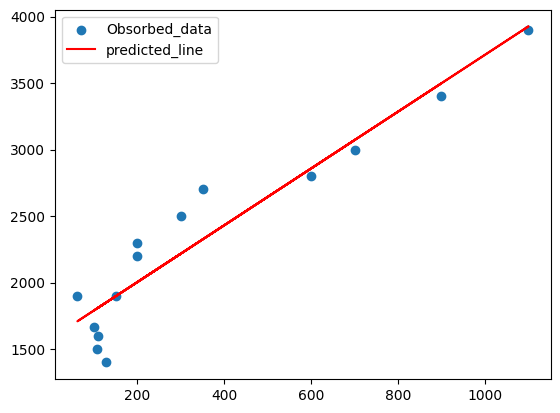

In [21]:
#regression line
plt.scatter(df['Weight_gained'],df['Calories_Consumed'])
plt.plot(df['Weight_gained'],pred1,'r')
plt.legend(['Obsorbed_data',"predicted_line"])
plt.show()

In [22]:
#error calculation  -----> error =  av - pv
res1 = df.Calories_Consumed - pred1
res_sqr1 = res1 * res1            
mse1 = np.mean(res_sqr1)          #mean square error
rmse1 = np.sqrt(mse1)            #root mean square error
rmse1

232.83350070960893

array([[1.        , 0.93680369],
       [0.93680369, 1.        ]])

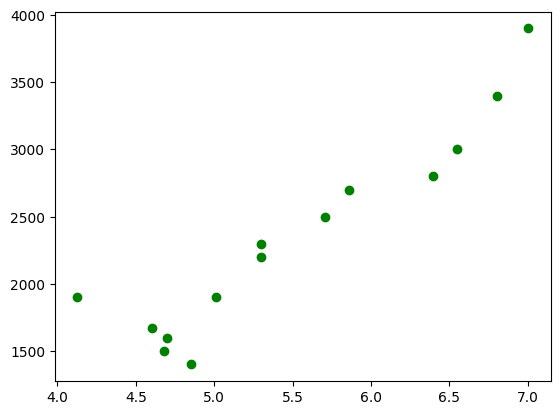

In [23]:
#model building on transformed data
#log transformation
# x = log(Weight_gained); y = Calories_Consumed

plt.scatter(x=np.log(df.Weight_gained),y=df.Calories_Consumed, color='green')
np.corrcoef(np.log(df.Weight_gained), df.Calories_Consumed)

In [24]:
model2 = smf.ols('Calories_Consumed ~ np.log(Weight_gained)', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_Consumed   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           8.02e-07
Time:                        23:13:04   Log-Likelihood:                -97.363
No. Observations:                  14   AIC:                             198.7
Df Residuals:                      12   BIC:                             200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1911.1244    464.188     -4.117      0.001   -2922.503    -899.746
np.log(Weight_gained)   774.1735     83.462      9.276      0.000     592.326     956.021
==============================================================================
Omnibus:                        4.026   Durbin-Watson:                   3.009
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.659
Skew:                           0.772   Prob(JB):                        0.436
Kurtosis:                       3.679   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pred2 = model2.predict(pd.DataFrame(df.Weight_gained))
pred2

0     1713.657759
1     2190.692769
2     3355.109707
3     2190.692769
4     2504.593132
5     1727.863176
6     1845.189099
7     1283.993883
8     3041.209345
9     3510.463652
10    1654.076556
11    1967.976918
12    2623.932511
13    3160.548724
dtype: float64

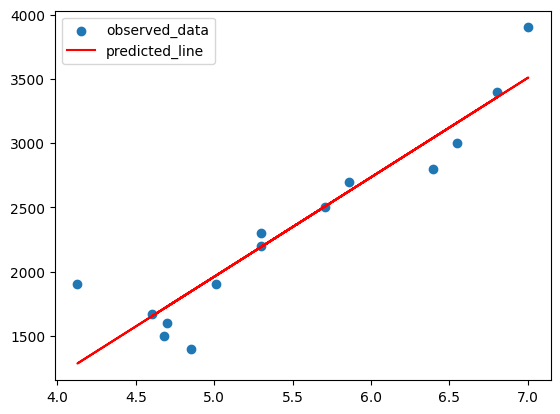

In [26]:
plt.scatter(np.log(df.Weight_gained), df.Calories_Consumed)

plt.plot(np.log(df.Weight_gained), pred2, 'r')

plt.legend(["observed_data","predicted_line"])

plt.show()

In [27]:
#error calculation
res2 = df.Calories_Consumed -pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 =np.sqrt(mse2)
rmse2

253.5580403936625

array([[1.        , 0.89872528],
       [0.89872528, 1.        ]])

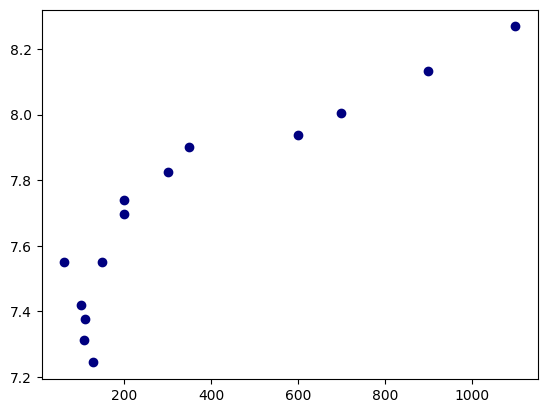

In [28]:
#exponential transformation
#x= Weight_gained y=log(Calories_Consumed)
plt.scatter(x = df['Weight_gained'],y =  np.log(df['Calories_Consumed']),color = 'navy')
np.corrcoef(df['Weight_gained'], np.log(df['Calories_Consumed']))

In [29]:
model3 = smf.ols('np.log(Calories_Consumed) ~ Weight_gained', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_Consumed)   R-squared:                       0.808
Model:                                   OLS   Adj. R-squared:                  0.792
Method:                        Least Squares   F-statistic:                     50.40
Date:                       Wed, 04 Jan 2023   Prob (F-statistic):           1.25e-05
Time:                               23:13:05   Log-Likelihood:                 8.3130
No. Observations:                         14   AIC:                            -12.63
Df Residuals:                             12   BIC:                            -11.35
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4068      0.058    128.367      0.000       7.281       7.533
Weight_gained     0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred3 = model3.predict(pd.DataFrame(df['Weight_gained']))
pred3_at = np.exp(pred3)
pred3_at

0     1805.909334
1     1953.101471
2     3545.194617
3     1953.101471
4     2126.731695
5     1808.988061
6     1836.933870
7     1736.526880
8     2745.847366
9     4203.546672
10    1793.646733
11    1871.676808
12    2219.252162
13    2989.952498
dtype: float64

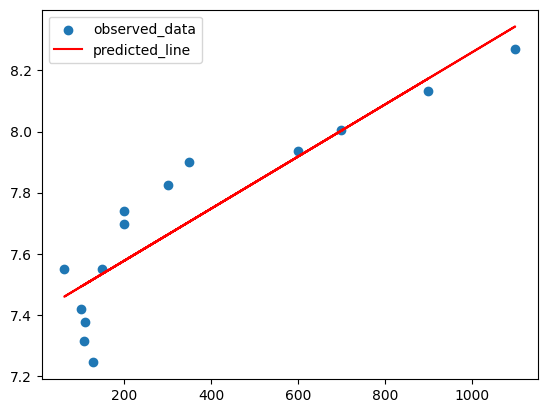

In [31]:
plt.scatter(df.Weight_gained, np.log(df.Calories_Consumed))
plt.plot(df.Weight_gained, pred3, 'r')
plt.legend(['observed_data',"predicted_line"])
plt.show()

In [32]:
#error calculation

res3 = df.Calories_Consumed - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

272.4207117048496

In [33]:
df=df.sort_values(['Weight_gained'])
df

,Weight_gained,Calories_Consumed
7,62,1900
10,100,1670
0,108,1500
5,110,1600
6,128,1400
11,150,1900
1,200,2300
3,200,2200
4,300,2500
12,350,2700


In [34]:
#polynomial transformation
# x=Weight_gained, x^2=Weight_gained*Weight_gained y= np.log(Calories_consumed)
model4 = smf.ols("np.log(Calories_Consumed) ~ Weight_gained + I(Weight_gained*Weight_gained)", data= df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_Consumed)   R-squared:                       0.852
Model:                                   OLS   Adj. R-squared:                  0.825
Method:                        Least Squares   F-statistic:                     31.55
Date:                       Wed, 04 Jan 2023   Prob (F-statistic):           2.78e-05
Time:                               23:13:06   Log-Likelihood:                 10.125
No. Observations:                         14   AIC:                            -14.25
Df Residuals:                             11   BIC:                            -12.33
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2892      0.084     86.724      0.000       7.104       7.474
Weight_gained                        0.0017      0.000      3.560      0.004       0.001       0.003
I(Weight_gained * Weight_gained) -7.689e-07   4.27e-07     -1.803      0.099   -1.71e-06     1.7e-07
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.721
Skew:                          -0.394   Prob(JB):                        0.697
Kurtosis:                       2.217   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)
pred4_at

7     1620.099409
10    1718.608337
0     1739.606122
5     1744.868700
6     1792.457905
11    1851.135743
1     1986.232241
3     1986.232241
4     2260.501362
12    2397.660886
8     3038.496984
13    3251.772007
2     3556.374964
9     3657.476403
dtype: float64

In [36]:
#For visualization there is a problem in Python they can't visualize with 3 variable, only 2 sholud be there
#regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x = df.iloc[:,0:1].values
x_poly = poly_reg.fit_transform(x)
x_poly

array([[1.0000e+00, 6.2000e+01, 3.8440e+03],
       [1.0000e+00, 1.0000e+02, 1.0000e+04],
       [1.0000e+00, 1.0800e+02, 1.1664e+04],
       [1.0000e+00, 1.1000e+02, 1.2100e+04],
       [1.0000e+00, 1.2800e+02, 1.6384e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 2.0000e+02, 4.0000e+04],
       [1.0000e+00, 2.0000e+02, 4.0000e+04],
       [1.0000e+00, 3.0000e+02, 9.0000e+04],
       [1.0000e+00, 3.5000e+02, 1.2250e+05],
       [1.0000e+00, 6.0000e+02, 3.6000e+05],
       [1.0000e+00, 7.0000e+02, 4.9000e+05],
       [1.0000e+00, 9.0000e+02, 8.1000e+05],
       [1.0000e+00, 1.1000e+03, 1.2100e+06]])

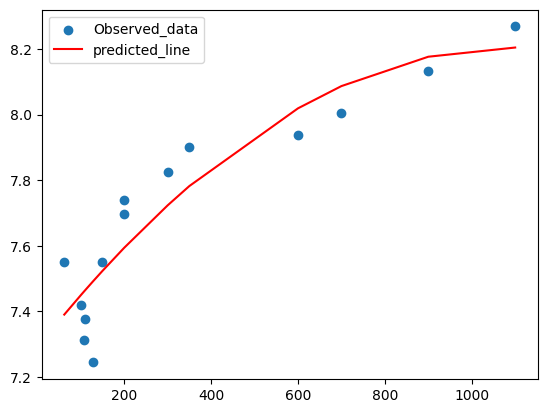

In [37]:
plt.scatter(df.Weight_gained, np.log(df.Calories_Consumed))
plt.plot(x, pred4, color='red')
plt.legend(['Observed_data',"predicted_line"])
plt.show()

In [38]:
#error calculation
res4 = df.Calories_Consumed - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

240.8277757040401

In [39]:
#choose the best model using RMSE
data = {'model': pd.Series(["SLR","LOG Model","EXP Model","POLY Model"]),'RMSE':pd.Series([rmse1,rmse2,rmse3,rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,model,RMSE
0,SLR,232.833501
1,LOG Model,253.558040
2,EXP Model,272.420712
3,POLY Model,240.827776


from the above SLR model  (SLR    232.833501)  gives the least error

In [40]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.3,random_state = 0)

In [41]:
final_model = smf.ols("Calories_Consumed ~ Weight_gained", data= train).fit()
final_model.summary()  

##R-squared:0.947 = it is more than 0.9 => Strong correlation => goodness of fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_Consumed   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     126.1
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           9.93e-06
Time:                        23:13:07   Log-Likelihood:                -59.210
No. Observations:                   9   AIC:                             122.4
Df Residuals:                       7   BIC:                             122.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1639.8565     97.817     16.765      0.000    1408.557    1871.156
Weight_gained     2.0468      0.182     11.227      0.000       1.616       2.478
==============================================================================
Omnibus:                        0.723   Durbin-Watson:                   2.805
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.400
Skew:                           0.453   Prob(JB):                        0.819
Kurtosis:                       2.504   Cond. No.                         797.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#predict on the test data
test_pred = final_model.predict(pd.DataFrame(test))
test_pred

4     2253.906739
1     2049.223328
6     1901.851272
13    3072.640384
0     1860.914590
dtype: float64

In [43]:
#model evaluation on test data
test_res = test.Calories_Consumed - test_pred
test_res_sqr = test_res * test_res
test_mse = np.mean(test_res_sqr)
test_rmse = np.sqrt(test_mse)
test_rmse

319.63776309764904

In [44]:
#prediction on train data
train_pred = final_model.predict(pd.DataFrame(train))
train_pred

9     3891.374029
12    2356.248445
10    1844.539917
3     2049.223328
8     2867.956973
5     1865.008258
7     1766.760221
11    1946.881623
2     3482.007207
dtype: float64

In [45]:
#model evaluation on train data
train_res = train.Calories_Consumed - train_pred
train_res_sqr = train_res * train_res
train_mse = np.mean(train_res_sqr)
train_rmse = np.sqrt(train_mse)
train_rmse

174.15215589481687

# Problem - 2 

### A logistics company recorded the time taken for delivery and the time taken for the sorting of the items for delivery. Build a Simple Linear Regression model to find the relationship between delivery time and sorting time with delivery time as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

In [46]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
dt = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day30-Simple LinearReg\Datasets_SLR\delivery_time.csv")
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [48]:
##renaming so that no sapces is there otherwise error.

dt.columns = "DeliveryTime", "SortingTime" 

In [49]:
#checking for null values
dt.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [50]:
#eda or statistical analysis
dt.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


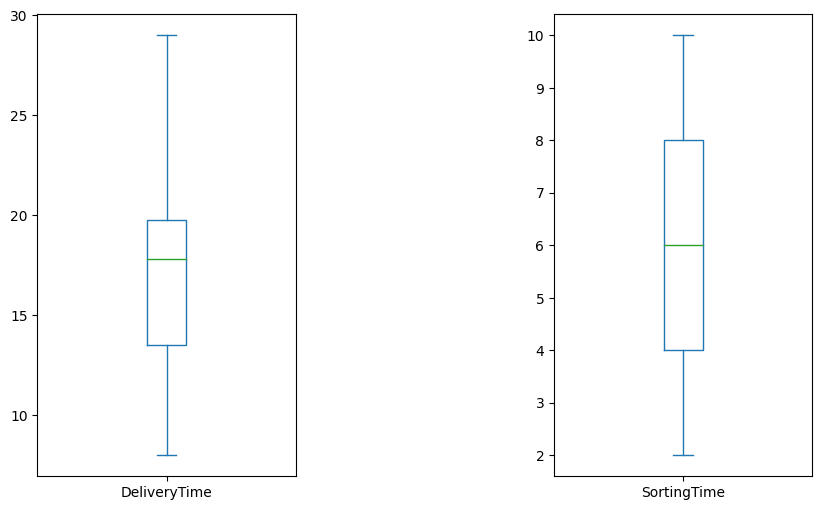

In [51]:
#graphical representation
#boxplot for outliers
dt.plot(kind='box',subplots=True, sharey=False,figsize=(10,6))
plt.subplots_adjust(wspace=1)
plt.show()

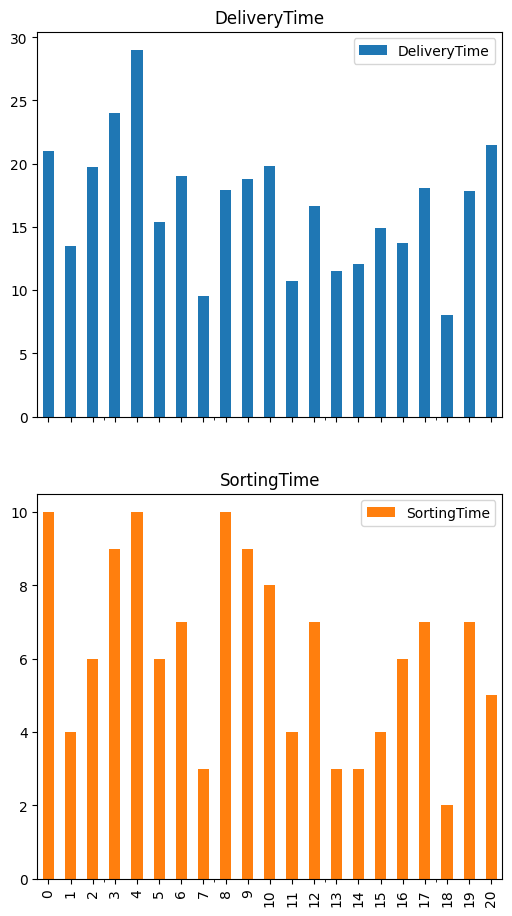

In [52]:
#barplot
dt.plot(kind='bar', subplots=True,sharey=False, figsize=(6,11))
plt.subplots_adjust(wspace=0.75)
plt.show()

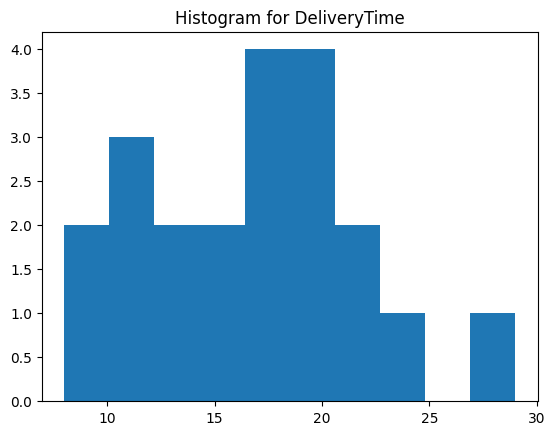

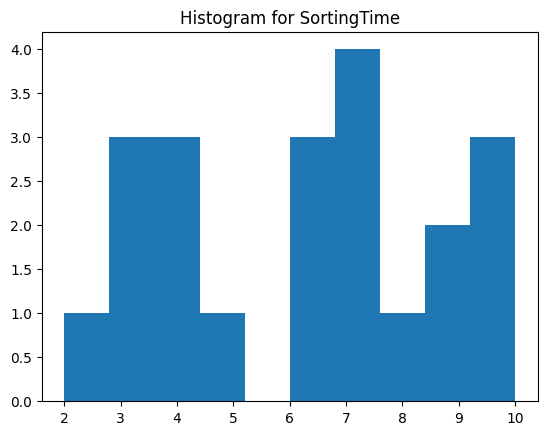

In [53]:
#histogram
for i in dt.columns:
    plt.hist(x = dt[i])
    plt.title("Histogram for " + str(i))
    plt.show()

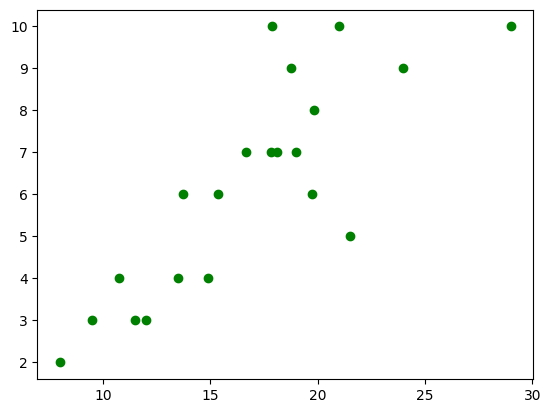

In [54]:
#bivariate analysis
plt.scatter(x= dt.DeliveryTime, y=dt.SortingTime, color='green')

In [55]:
#check correlation matrix - to check the strength of variation b/w two variables
np.corrcoef(dt.DeliveryTime,dt.SortingTime)


array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [56]:
# Covariance
cov_output = np.cov(dt.DeliveryTime, dt.SortingTime)[0,1]
cov_output

10.655809523809523

<AxesSubplot: >

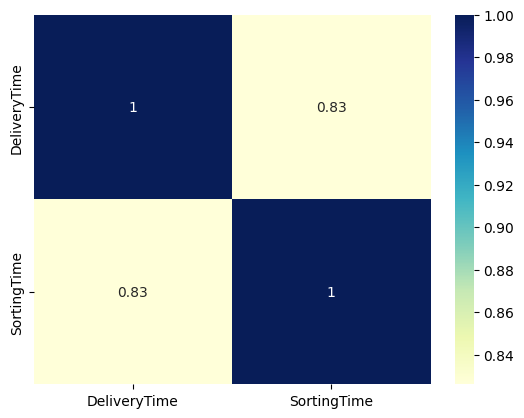

In [57]:
sns.heatmap(dt.corr(), annot=True, cmap ='YlGnBu')

In [58]:
#simple linear regression
import statsmodels.formula.api as smf

In [59]:
model1 = smf.ols("DeliveryTime ~ SortingTime", data =dt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        23:13:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
pred1 = model1.predict(pd.DataFrame(dt['SortingTime']))
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

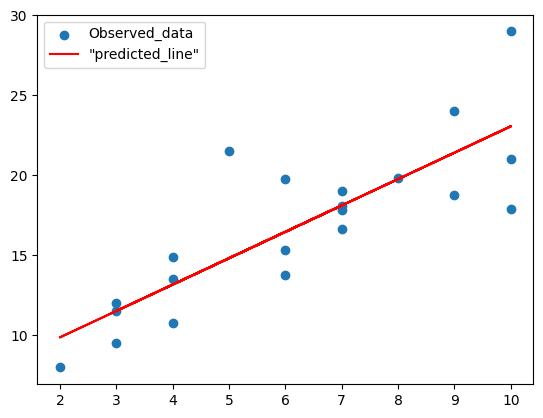

In [61]:
#regression line
plt.scatter(dt['SortingTime'], dt['DeliveryTime'])
plt.plot(dt['SortingTime'], pred1, 'r')
plt.legend(['Observed_data','"predicted_line"'])
plt.show()

In [62]:
#error calculation
res1 = dt.DeliveryTime - pred1  #av-pv
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

2.7916503270617654

array([[1.        , 0.83393253],
       [0.83393253, 1.        ]])

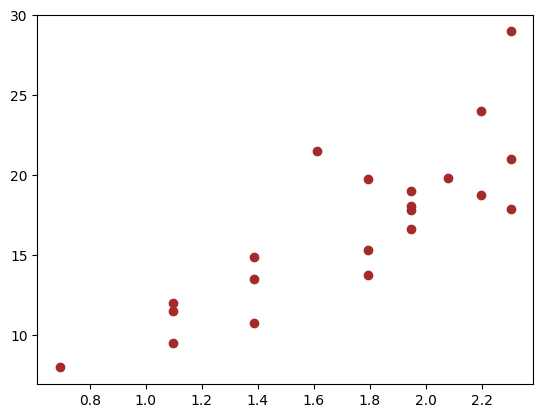

In [63]:
######### Model building on Transformed Data
#log transformation
#x=log(sorting-time), y=delievery-time

plt.scatter(x=np.log(dt['SortingTime']), y=dt['DeliveryTime'], color='brown')
np.corrcoef(np.log(dt.SortingTime),dt.DeliveryTime)

In [64]:

model2 = smf.ols('DeliveryTime ~ np.log(SortingTime)', data = dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        23:13:11   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
pred2 = model2.predict(pd.DataFrame(dt['SortingTime']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

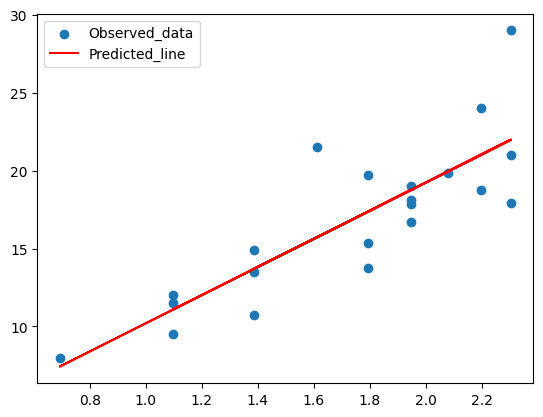

In [66]:
#regression line

plt.scatter(np.log(dt.SortingTime), dt.DeliveryTime)
plt.plot(np.log(dt.SortingTime), pred2, 'r')
plt.legend(['Observed_data', 'Predicted_line'])
plt.show()

In [67]:
#error calculation
res2 = dt.DeliveryTime - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

2.733171476682066

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

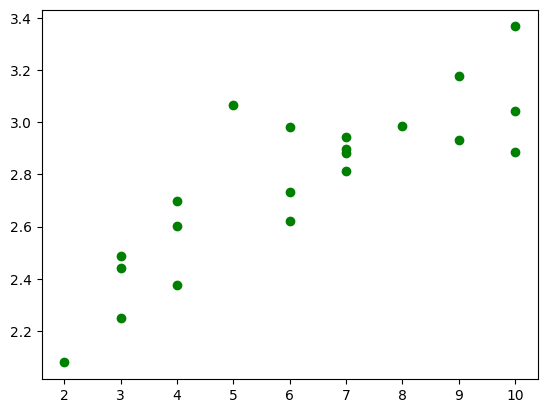

In [68]:
#exponential transformation
# x = Sorting_time ; y = log(Delvery_time)
plt.scatter(x=dt.SortingTime, y=np.log(dt.DeliveryTime), color='green')
np.corrcoef(dt.SortingTime,np.log(dt.DeliveryTime))

In [69]:
model3 = smf.ols('np.log(DeliveryTime) ~ SortingTime', data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Wed, 04 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                          23:13:12   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
pred3 = model3.predict(pd.DataFrame(dt['SortingTime']))
pred3_at = np.exp(pred3)
pred3_at

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

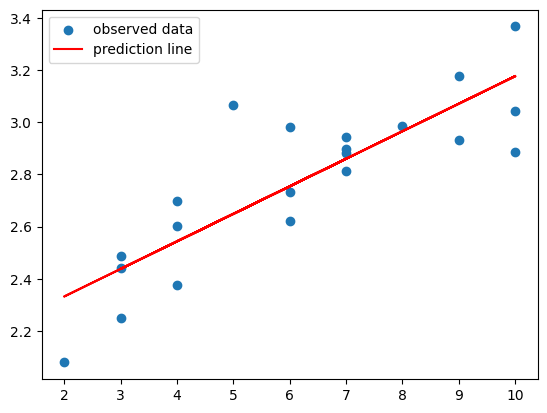

In [71]:
#regression line
plt.scatter(dt.SortingTime, np.log(dt.DeliveryTime))
plt.plot(dt.SortingTime, pred3, 'r')
plt.legend(['observed data', 'prediction line'])
plt.show()

In [72]:
res3 = dt.DeliveryTime - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3) 
rmse3

2.9402503230562007

In [73]:
dt = dt.sort_values(['SortingTime'])
df

,Weight_gained,Calories_Consumed
7,62,1900
10,100,1670
0,108,1500
5,110,1600
6,128,1400
11,150,1900
1,200,2300
3,200,2200
4,300,2500
12,350,2700


In [74]:
#polynomial transformation
# x=SortingTime, x^2=SortingTime*SortingTime y= np.log(DeliveryTime)
model4 = smf.ols("np.log(DeliveryTime) ~ SortingTime + I(SortingTime*SortingTime)",data=dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Wed, 04 Jan 2023   Prob (F-statistic):           2.20e-06
Time:                          23:13:12   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime                      0.2659      0.080      3.315      0.004       0.097       0.434
I(SortingTime * SortingTime)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
pred4 = model4.predict(pd.DataFrame(dt))
pred4_at = np.exp(pred4)
pred4_at

18     8.847949
7     10.825502
13    10.825502
14    10.825502
1     12.909227
15    12.909227
11    12.909227
20    15.003730
2     16.995933
5     16.995933
16    16.995933
17    18.764526
6     18.764526
19    18.764526
12    18.764526
10    20.191891
3     21.176938
9     21.176938
8     21.646921
4     21.646921
0     21.646921
dtype: float64

In [76]:
#regression line
from sklearn.preprocessing import PolynomialFeatures

In [77]:
poly_reg = PolynomialFeatures(degree=2)
x = dt.iloc[:, 1:].values
x_poly = poly_reg.fit_transform(x)
x_poly

array([[  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   3.,   9.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   4.,  16.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   6.,  36.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  10., 100.]])

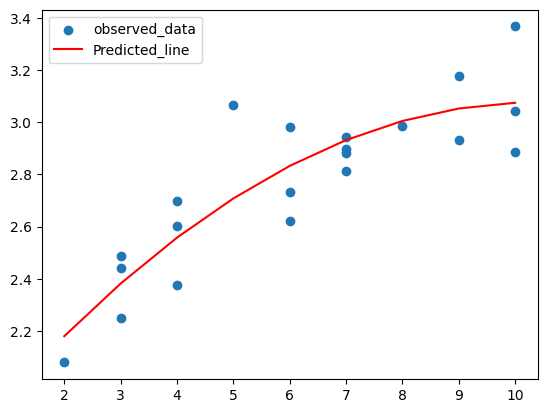

In [78]:
plt.scatter(dt.SortingTime, np.log(dt.DeliveryTime))
plt.plot(x, pred4, 'r')
plt.legend(['observed_data', 'Predicted_line'])
plt.show()

In [79]:
res4 = dt.DeliveryTime - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

2.799041988740937

In [80]:
#choose the best model using RMSE 
data ={"Model":pd.Series(['SLR','Log model','Exp model','poly model']),'RMSE':pd.Series([rmse1,rmse2,rmse3,rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse        #Log Transformation model  2.733171 gives least error

,Model,RMSE
0,SLR,2.791650
1,Log model,2.733171
2,Exp model,2.940250
3,poly model,2.799042


In [81]:
# Evaluate the model
from sklearn.model_selection import train_test_split

In [82]:
train, test = train_test_split(dt,test_size=0.2,random_state=0)

In [83]:
final_model = smf.ols("DeliveryTime ~ np.log(SortingTime)", data=train).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     27.40
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           0.000126
Time:                        23:13:13   Log-Likelihood:                -40.401
No. Observations:                  16   AIC:                             84.80
Df Residuals:                      14   BIC:                             86.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3661      3.030      0.451      0.659      -5.132       7.864
np.log(SortingTime)     8.9869      1.717      5.235      0.000       5.305      12.669
==============================================================================
Omnibus:                        3.097   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.743
Skew:                           0.808   Prob(JB):                        0.418
Kurtosis:                       3.054   Cond. No.                         8.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#predict the test data
test_pred = final_model.predict(pd.DataFrame(test))
test_pred

2     17.468533
19    18.853877
0     22.059294
7     11.239258
17    18.853877
dtype: float64

In [85]:
#model evaluation on test data
test_res = test.DeliveryTime - test_pred
test_res_sqr = test_res * test_res
test_mse = np.mean(test_res_sqr)
test_rmse = np.sqrt(test_mse)
test_rmse

1.4801277578090193

In [86]:
#predict on train data
train_predict = final_model.predict(pd.DataFrame(train))
train_predict

16    17.468533
12    18.853877
8     22.059294
11    13.824641
4     22.059294
1     13.824641
13    11.239258
15    13.824641
3     21.112425
5     17.468533
20    15.830020
9     21.112425
14    11.239258
18     7.595366
10    20.053916
6     18.853877
dtype: float64

In [87]:
#model evaluation on train data
train_res = dt.DeliveryTime - train_predict
train_res_sqr = train_res * train_res
train_mse = np.mean(train_res_sqr)
train_rmse = np.sqrt(train_mse)
train_rmse

3.0226584304104835

# Problem - 3

### A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

In [88]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
emp = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day30-Simple LinearReg\Datasets_SLR\emp_data.csv")
emp

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [90]:
#check for null values
emp.isnull().sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

In [91]:
#eda or statistical anlysis
emp.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


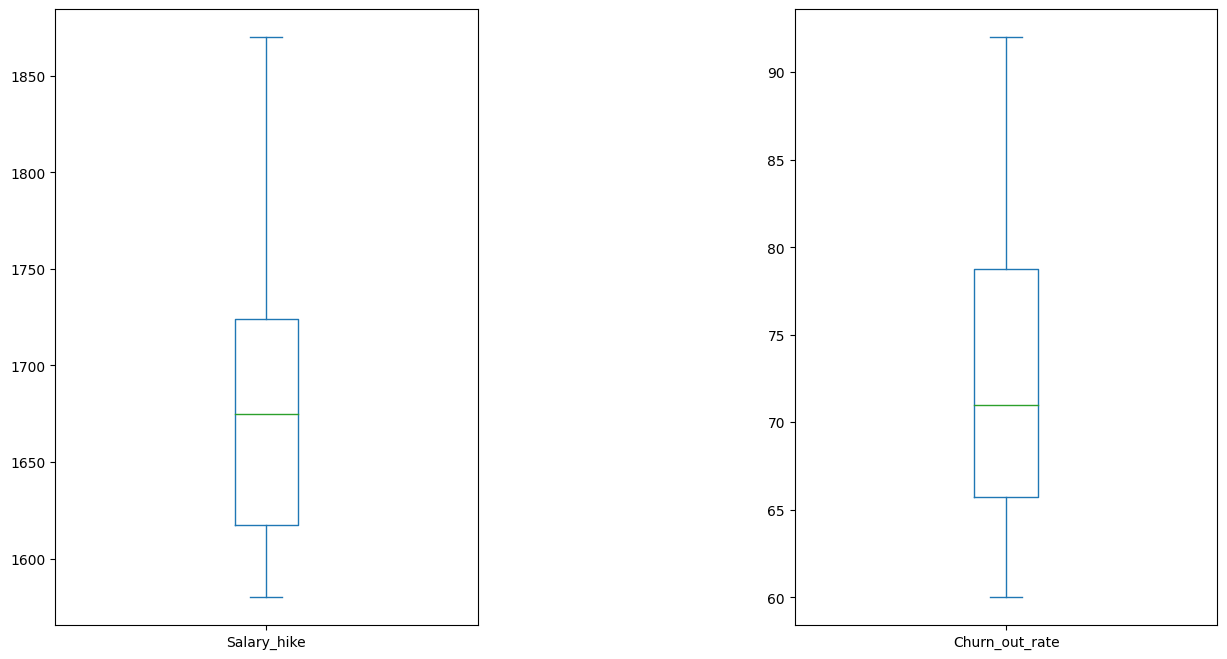

In [92]:
#graphical anlysis
#boxplot
emp.plot(kind='box',subplots=True,sharey=False,figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

<BarContainer object of 10 artists>

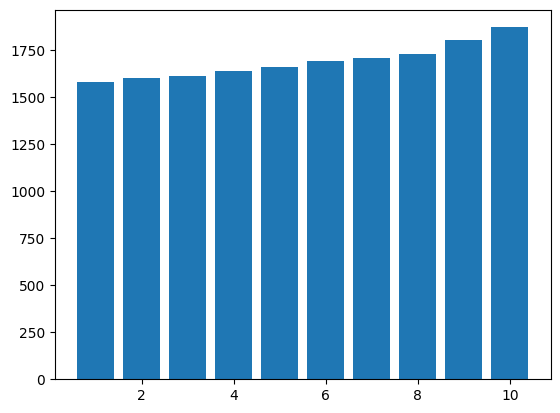

In [93]:
plt.bar(height=emp.Salary_hike,x=np.arange(1,11,1))

<BarContainer object of 10 artists>

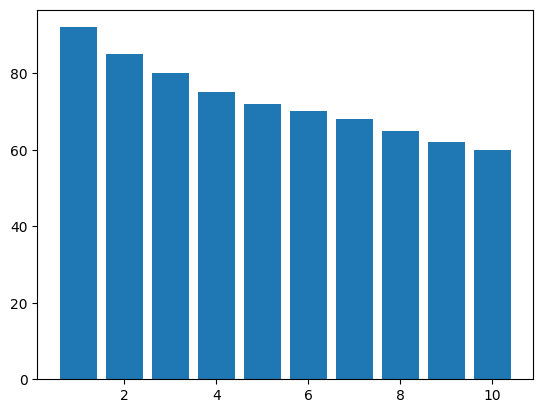

In [94]:
plt.bar(height=emp.Churn_out_rate,x=np.arange(1,11,1))

(array([2., 1., 2., 1., 1., 1., 0., 1., 0., 1.]),
 array([1580., 1609., 1638., 1667., 1696., 1725., 1754., 1783., 1812.,
        1841., 1870.]),
 <BarContainer object of 10 artists>)

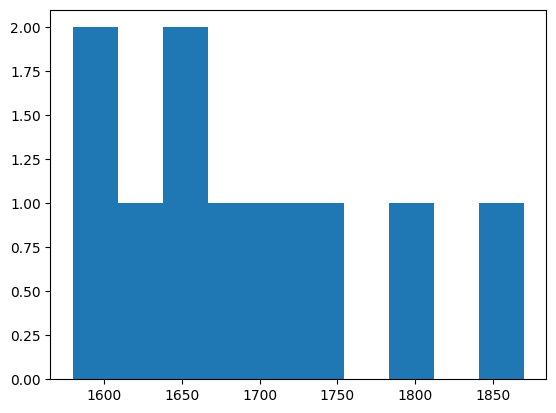

In [95]:
plt.hist(emp.Salary_hike)

(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <BarContainer object of 10 artists>)

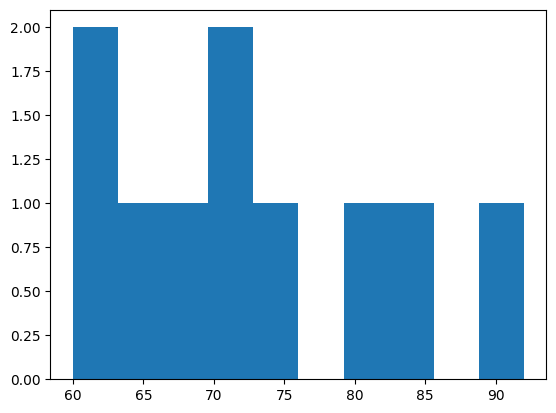

In [96]:
plt.hist(emp.Churn_out_rate)

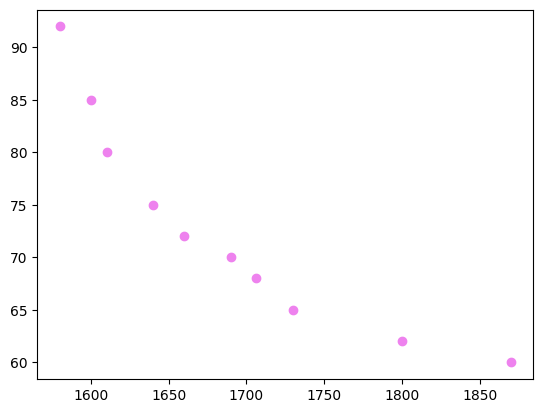

In [97]:
#bvariate anlysis
#scatter plot
plt.scatter(x=emp.Salary_hike, y=emp.Churn_out_rate, color='violet')

In [98]:
## Measure the strength of the relationship between two variables using Correlation coefficient.
np.corrcoef(emp.Salary_hike,emp.Churn_out_rate)

array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

In [99]:
#covariance
cov_output= np.cov(emp.Salary_hike,emp.Churn_out_rate)[0,1]
cov_output

-861.2666666666667

<AxesSubplot: >

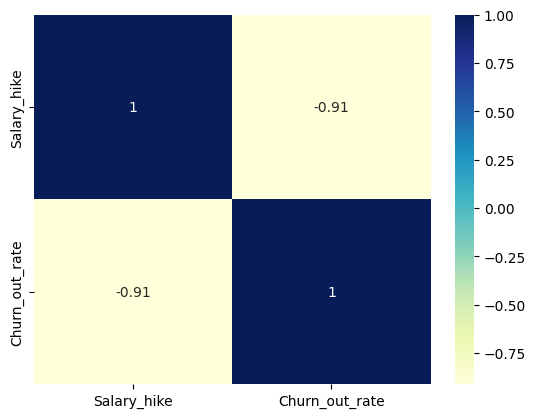

In [100]:
sns.heatmap(emp.corr(),annot=True,cmap='YlGnBu')

In [101]:
import statsmodels.formula.api as smf

In [102]:
#simple linear
model1= smf.ols('Churn_out_rate ~ Salary_hike', data = emp).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           0.000239
Time:                        23:13:17   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
#perdict the model
pred1 = model1.predict(pd.DataFrame(emp['Salary_hike']))
pred1

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

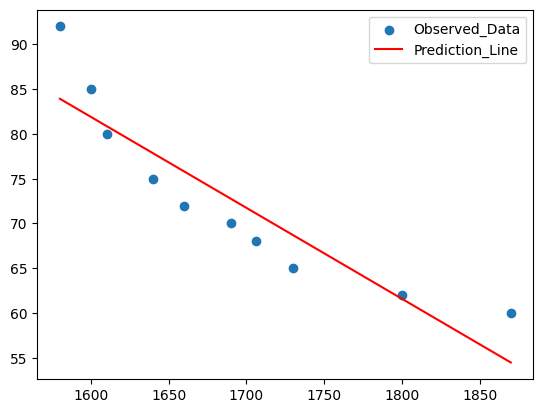

In [104]:
#regression line
plt.scatter(emp.Salary_hike,emp.Churn_out_rate)
plt.plot(emp.Salary_hike, pred1, 'r')
plt.legend(['Observed_Data', 'Prediction_Line'])
plt.show()

In [105]:
#error calculation
res1= emp.Churn_out_rate - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

3.9975284623377902

array([[ 1.        , -0.92120773],
       [-0.92120773,  1.        ]])

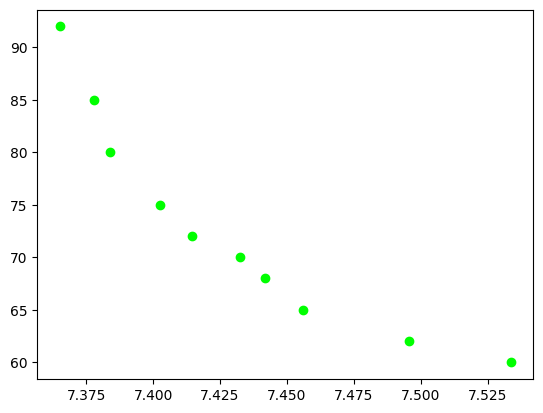

In [106]:
######### Model building on Transformed Data
#log transformation
#x=log(Salaryhike), y=churnrate

#correlation
plt.scatter(x= np.log(emp.Salary_hike), y= emp.Churn_out_rate, color='lime')
np.corrcoef(np.log(emp.Salary_hike),emp.Churn_out_rate)

In [107]:
model2= smf.ols('Churn_out_rate ~ np.log(Salary_hike)', data=emp).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           0.000153
Time:                        23:13:17   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
#pediction
pred2 = model2.predict(pd.DataFrame(emp.Salary_hike))
pred2

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

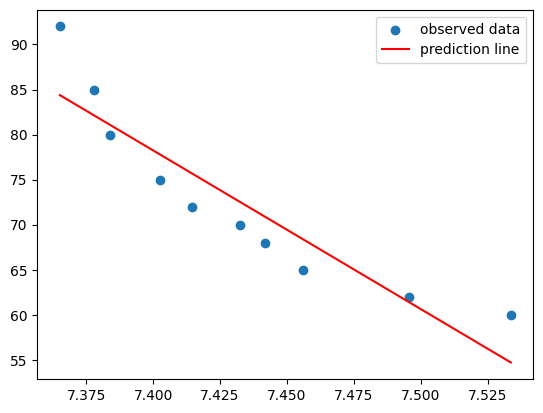

In [109]:
#regression line
plt.scatter(np.log(emp.Salary_hike), emp.Churn_out_rate)
plt.plot(np.log(emp['Salary_hike']), pred2, 'r')
plt.legend(['observed data','prediction line'])
plt.show()

In [110]:
#error calculation
res2 = emp.Churn_out_rate - pred2
res_sqr2 = res2* res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

3.7860036130227854

array([[ 1.        , -0.93463607],
       [-0.93463607,  1.        ]])

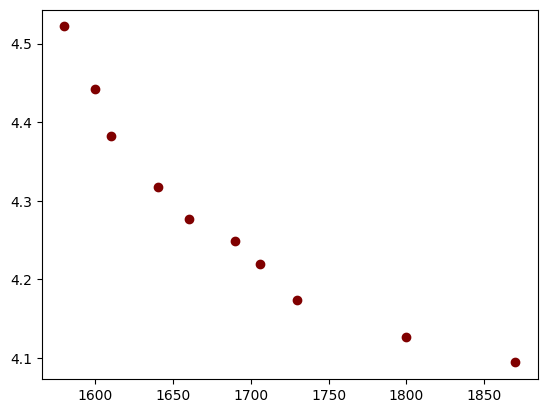

In [111]:
#exponential transformation
#x=salary_hike, y=np.log(Churn_rate) 

plt.scatter(x=emp.Salary_hike, y=np.log(emp.Churn_out_rate), color = 'maroon')
np.corrcoef(emp.Salary_hike, np.log(emp.Churn_out_rate))

In [112]:
model3 = smf.ols("np.log(Churn_out_rate) ~ Salary_hike", data=emp).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.874
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     55.26
Date:                    Wed, 04 Jan 2023   Prob (F-statistic):           7.38e-05
Time:                            23:13:18   Log-Likelihood:                 16.511
No. Observations:                      10   AIC:                            -29.02
Df Residuals:                           8   BIC:                            -28.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6383      0.318     20.902      0.000       5.906       7.371
Salary_hike    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
pred3 = model3.predict(pd.DataFrame(emp.Salary_hike))
pred3_at = np.exp(pred3)
pred3_at

0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

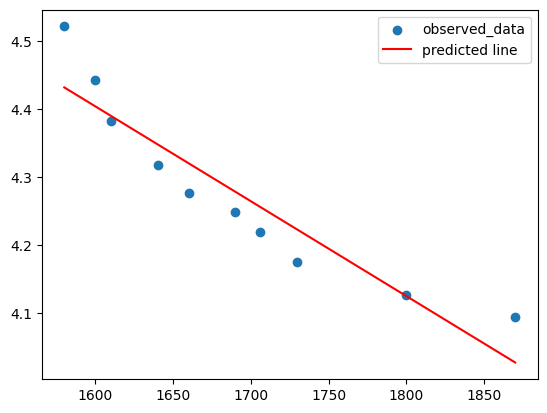

In [114]:
#regression line
plt.scatter(emp.Salary_hike, np.log(emp.Churn_out_rate))
plt.plot(emp.Salary_hike, pred3, 'r')
plt.legend(['observed_data', 'predicted line'])
plt.show()

In [115]:
#error value
res3 = emp.Churn_out_rate - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

3.541549318821563

In [116]:
emp = emp.sort_values(['Salary_hike'])
emp

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [117]:
#polynomial transformation
#x=salaryhike, x^2=salary_hike*salary_hike, y=np.log(Churn_out_rate)

model4 = smf.ols('np.log(Churn_out_rate) ~ Salary_hike + I(Salary_hike*Salary_hike)', data=emp).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.984
Model:                                OLS   Adj. R-squared:                  0.979
Method:                     Least Squares   F-statistic:                     210.1
Date:                    Wed, 04 Jan 2023   Prob (F-statistic):           5.63e-07
Time:                            23:13:19   Log-Likelihood:                 26.728
No. Observations:                      10   AIC:                            -47.46
Df Residuals:                           7   BIC:                            -46.55
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       23.1762      2.415      9.597      0.000      17.466      28.887
Salary_hike                     -0.0207      0.003     -7.351      0.000      -0.027      -0.014
I(Salary_hike * Salary_hike)  5.605e-06   8.17e-07      6.857      0.000    3.67e-06    7.54e-06
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.506
Skew:                          -0.088   Prob(JB):                        0.777
Kurtosis:                       1.913   Cond. No.                     1.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
pred4 = model4.predict(pd.DataFrame(emp))
pred4_at = np.exp(pred4)
pred4_at

0    89.470282
1    84.502725
2    82.261561
3    76.400595
4    73.135942
5    69.076991
6    67.282128
7    65.025854
8    61.079708
9    60.612686
dtype: float64

In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x =emp.iloc[:, 0:1]
x_poly = poly_reg.fit_transform(x)

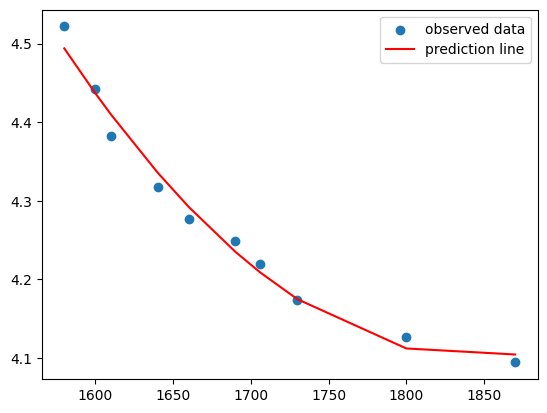

In [120]:
#regression line
plt.scatter(emp.Salary_hike, np.log(emp.Churn_out_rate))
plt.plot(x, pred4, 'r')
plt.legend(['observed data', 'prediction line'])
plt.show()

In [121]:
#error values
res4 = emp.Churn_out_rate - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

1.3267899683847653

In [122]:
#choose the best model using RMSE
data = {"Model":pd.Series(['SLR','Log Model','Exp Model','Poly Model']), 'RMSE':pd.Series([rmse1,rmse2,rmse3,rmse4])}
table = pd.DataFrame(data)
table                              
                                      #Polynomial model 1.326790 gives least error

,Model,RMSE
0,SLR,3.997528
1,Log Model,3.786004
2,Exp Model,3.541549
3,Poly Model,1.326790


In [123]:
#evaluate the model
from sklearn.model_selection import train_test_split

In [124]:
train,test = train_test_split(emp,test_size=0.2,random_state=0)

In [125]:
final_model = smf.ols('np.log(Churn_out_rate) ~ Salary_hike + I(Salary_hike*Salary_hike)', data=train).fit()
final_model.summary()   #R-squared:0.989= it is greater than 0.8 => strong correlation => goodness of fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.989
Model:                                OLS   Adj. R-squared:                  0.985
Method:                     Least Squares   F-statistic:                     229.2
Date:                    Wed, 04 Jan 2023   Prob (F-statistic):           1.21e-05
Time:                            23:13:19   Log-Likelihood:                 23.056
No. Observations:                       8   AIC:                            -40.11
Df Residuals:                           5   BIC:                            -39.87
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       24.1592      2.125     11.368      0.000      18.696      29.622
Salary_hike                     -0.0218      0.002     -8.814      0.000      -0.028      -0.015
I(Salary_hike * Salary_hike)  5.898e-06   7.15e-07      8.245      0.000    4.06e-06    7.74e-06
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.691
Skew:                          -0.397   Prob(JB):                        0.708
Kurtosis:                       1.799   Cond. No.                     1.00e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
#prediction on test data
test_predict = final_model.predict(pd.DataFrame(test))
test_predict_churn = np.exp(test_predict)
test_predict_churn

2    82.906551
8    60.657344
dtype: float64

In [127]:
#model evalustion on test data
test_res = test.Churn_out_rate - test_predict_churn
test_res_Sqr = test_res * test_res
test_mse = np.mean(test_res_Sqr)
test_rmse = np.sqrt(test_mse)
test_rmse

2.263930570780035

In [128]:
#prediction on train data
train_predict = final_model.predict(pd.DataFrame(train))
train_predict_churn = np.exp(train_predict)
train_predict_churn

4    73.273212
9    60.187866
1    85.281449
6    67.128264
7    64.768249
3    76.712419
0    90.557206
5    69.009210
dtype: float64

In [129]:
train_res = train.Churn_out_rate - train_predict_churn
train_res_sqr = train_res * train_res
train_mse = np.mean(train_res_sqr)
train_rmse = np.sqrt(train_mse)
train_rmse

1.0334957489369971

# Problem - 4

### The head of HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a dataset that contains the data about the number of years of experience and the salary hike given accordingly. Build a Simple Linear Regression model with salary as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

In [286]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
df = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day30-Simple LinearReg\Datasets_SLR\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [288]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [289]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


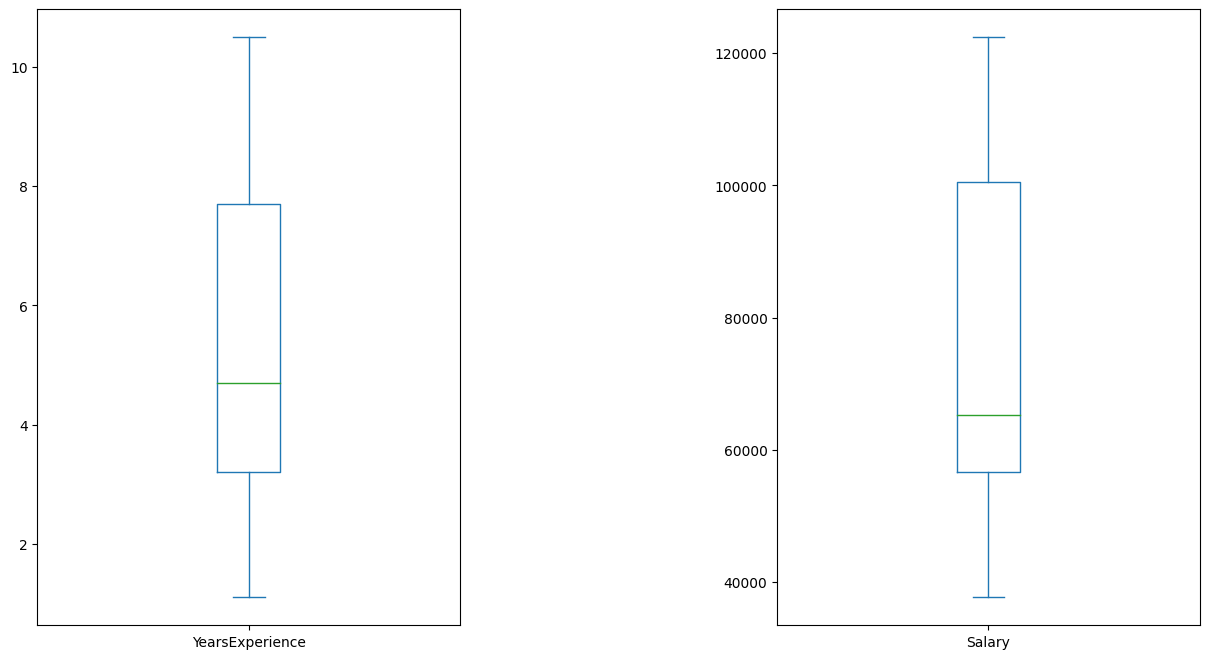

In [290]:
#boxplot
df.plot(kind='box',subplots=True, sharey=False,figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

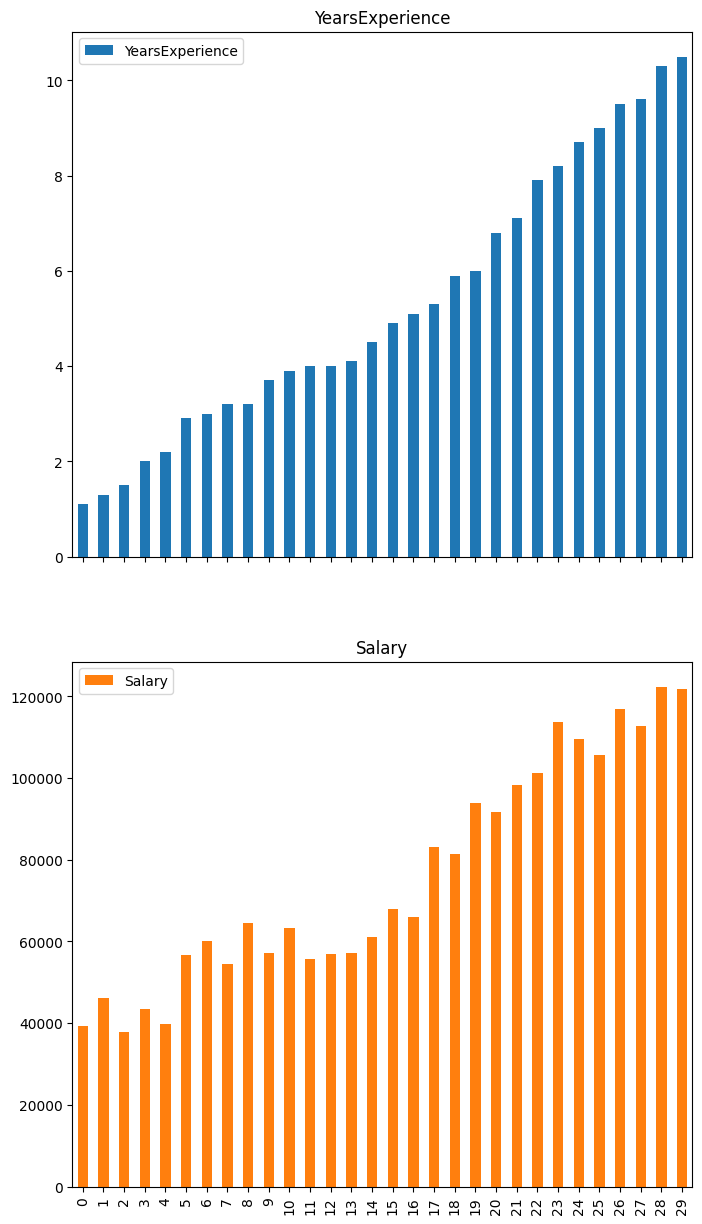

In [291]:
#barplot
df.plot(kind='bar',subplots=True, sharey=False,figsize=(8,15))
plt.subplots_adjust(wspace=0.75)
plt.show()

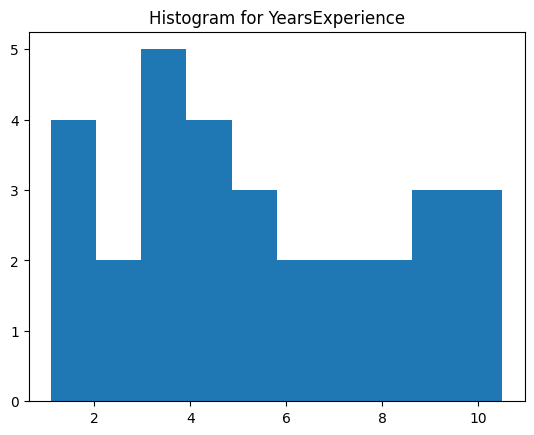

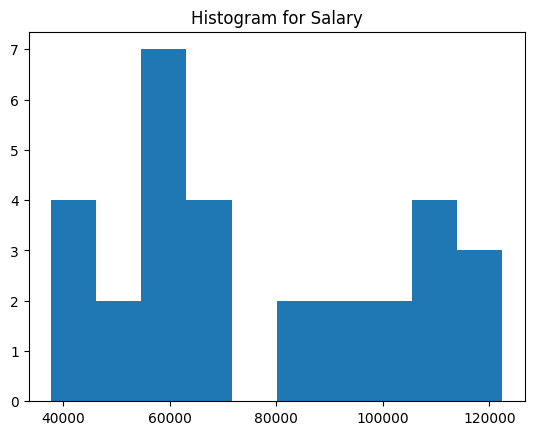

In [292]:
#histogram
for i in df.columns:
    plt.hist(x = df[i])
    plt.title("Histogram for " + str(i))
    plt.show()

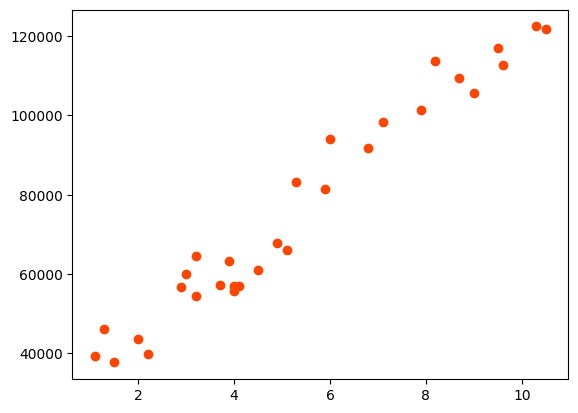

In [293]:
#bivariate anlysis
plt.scatter(x=df.YearsExperience,y=df.Salary, color='orangered')

In [294]:
#correlation
np.corrcoef(x=df.YearsExperience,y=df.Salary)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [295]:
cov_output = np.cov(df.YearsExperience,df.Salary)[0,1]
cov_output

76106.30344827585

<AxesSubplot: >

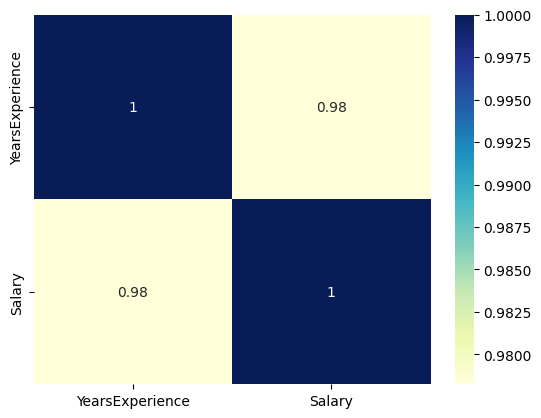

In [296]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [297]:
import statsmodels.formula.api as smf

In [298]:
#simple linear regression
model1 = smf.ols('Salary ~ YearsExperience', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        11:21:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
pred1 = model1.predict(pd.DataFrame(df.YearsExperience))
pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

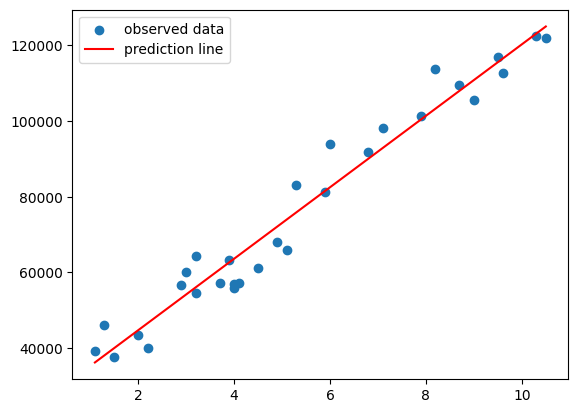

In [300]:
#regression line
plt.scatter(df.YearsExperience, df.Salary)
plt.plot(df.YearsExperience, pred1, 'r')
plt.legend(['observed data', 'prediction line'])
plt.show()

In [301]:
#error value
res1 = df.Salary - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

5592.043608760661

array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

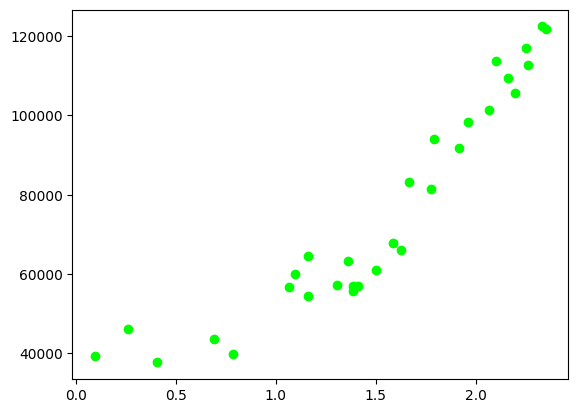

In [302]:
#log transfomation
#x = log(YearsExperiance, y=Salary)

plt.scatter(x=np.log(df.YearsExperience), y=df.Salary, color='lime')
np.corrcoef(np.log(df.YearsExperience), df.Salary)

In [303]:
model2= smf.ols('Salary ~ np.log(YearsExperience)', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        11:21:08   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
pred2 = model2.predict(pd.DataFrame(df.YearsExperience))
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

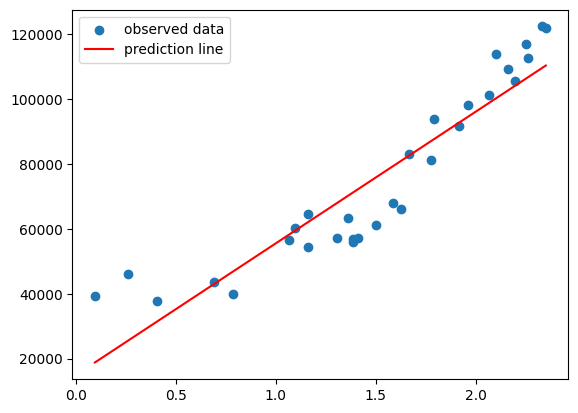

In [305]:
#regression line
plt.scatter(np.log(df.YearsExperience), df.Salary)
plt.plot(np.log(df.YearsExperience), pred2,'r')
plt.legend(['observed data', 'prediction line'])
plt.show()

In [306]:
#error value
res2 = df.Salary - pred2
res_sqr2 = res2*res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

10302.893706228306

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

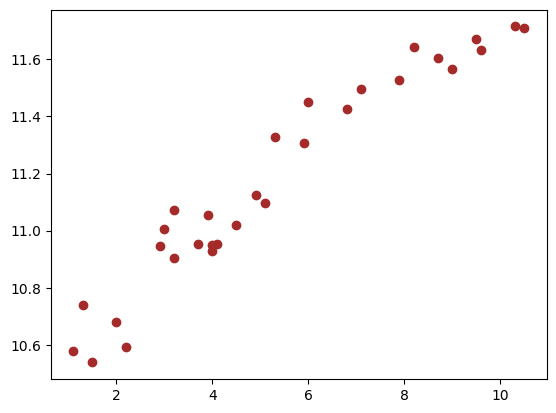

In [307]:
#Exponential Transformation
#x=YearsExperience,y=log(salary)

plt.scatter(x=df.YearsExperience, y=np.log(df.Salary), color='brown')
np.corrcoef(df.YearsExperience,np.log(df.Salary))

In [308]:
model3 = smf.ols("np.log(Salary) ~ YearsExperience", data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        11:21:08   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
pred3 = model3.predict(pd.DataFrame(df.YearsExperience))
pred3_at = np.exp(pred3)
pred3_at

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

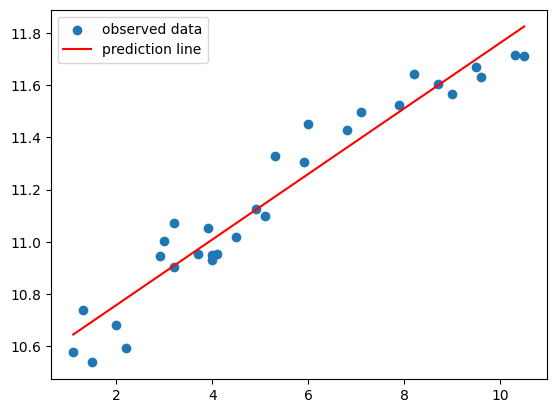

In [310]:
#regression line
plt.scatter(df.YearsExperience, np.log(df.Salary))
plt.plot(df.YearsExperience, pred3, 'r')
plt.legend(['observed data', 'prediction line'])
plt.show()

In [311]:
#error values
res3 = df.Salary - pred3_at
res_sqr3 = res3*res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

7213.23507662012

In [312]:
df = df.sort_values(['YearsExperience'])
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [313]:
#polynomial transformation
#x=YearsExperience, x^2=YearsExperience*YearsExperience, y=log(Salary)
model4 = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience*YearsExperience)', data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           3.95e-18
Time:                        11:21:09   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience                          0.2024      0.027      7.601      0.000       0.148       0.257
I(YearsExperience * YearsExperience)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)
pred4_at

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [315]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x = df.iloc[:, 0:1].values
x_poly = poly_reg.fit_transform(x)
x_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

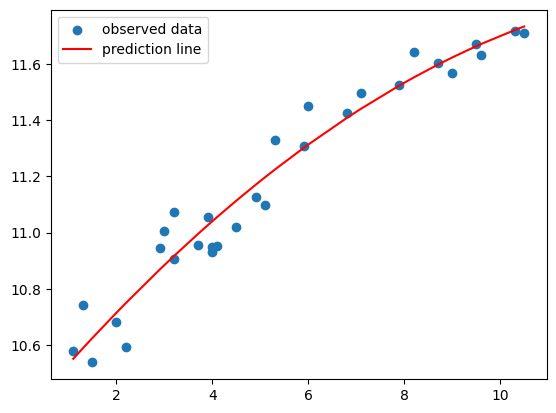

In [316]:
plt.scatter(df.YearsExperience,np.log(df.Salary))
plt.plot(df.YearsExperience,pred4, 'r')
plt.legend(['observed data', 'prediction line'])
plt.show()

In [317]:
#error values
res4 = df.Salary - pred4_at
res_sqr4= res4*res4
mse4=np.mean(res_sqr4)
rmse4=np.sqrt(mse4)
rmse4

5391.081582693611

In [318]:
# Choose the best model using RMSE
data = {"Model":pd.Series(['SLR',"LOG Model",'EXP Model','POLY Model']), "RMSE":([rmse1,rmse2,rmse3,rmse4])}
table = pd.DataFrame(data)
table            #Polynomial model 5391.081583 gives least error

,Model,RMSE
0,SLR,5592.043609
1,LOG Model,10302.893706
2,EXP Model,7213.235077
3,POLY Model,5391.081583


In [319]:
#EVALUATE THE MODEL
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2,random_state=0)

In [320]:
final_model = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience * YearsExperience)', data=train).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     148.5
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           4.06e-13
Time:                        11:21:09   Log-Likelihood:                 24.577
No. Observations:                  24   AIC:                            -43.15
Df Residuals:                      21   BIC:                            -39.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               10.3671      0.080    129.755      0.000      10.201      10.533
YearsExperience                          0.1948      0.032      6.095      0.000       0.128       0.261
I(YearsExperience * YearsExperience)    -0.0062      0.003     -2.229      0.037      -0.012      -0.000
==============================================================================
Omnibus:                        1.278   Durbin-Watson:                   2.726
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.887
Skew:                           0.075   Prob(JB):                        0.642
Kurtosis:                       2.070   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
#predict on test data
pred_test = final_model.predict(pd.DataFrame(test))
pred_test_sal = np.exp(pred_test)
pred_test_sal

2      42000.716190
28    122957.334309
13     63713.573642
10     61886.446519
26    116004.713002
24    108585.244265
dtype: float64

In [322]:
test_res = test.Salary - pred_test_sal
test_res_sqr= test_res*test_res
test_mse = np.mean(test_res_sqr)
test_rmse = np.sqrt(test_mse)
test_rmse

3315.6304294614447

In [323]:
#predict on train data
pred_train = final_model.predict(pd.DataFrame(train))
pred_train_sal = np.exp(pred_train)
pred_train_sal

27    116902.243223
11     62797.234939
17     75085.111469
22    100841.657453
5      53113.089446
16     73147.951352
8      55677.770873
14     67431.438420
23    103774.470357
20     89922.015350
1      40535.603142
29    124605.962869
6      53961.231669
4      47374.065015
18     80969.985440
19     81959.331259
9      60082.085915
7      55677.770873
25    111413.189410
3      45800.480699
0      39102.313814
21     92914.420308
15     71225.643054
12     62797.234939
dtype: float64

In [324]:
train_res = train.Salary - pred_train_sal
train_res_sqr= train_res*train_res
train_mse = np.mean(train_res_sqr)
train_rmse = np.sqrt(train_mse)
train_rmse

5830.493279675985

# Problem - 5

### A certain university wants to understand the relationship between students’ SAT scores and their GPA. Build a Simple Linear Regression model with GPA as the target variable and record the RMSE and correlation coefficient values for different models.

In [325]:
#importing required libraried
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
st = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day30-Simple LinearReg\Datasets_SLR\SAT_GPA.csv")
st

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6
...,...,...
195,509,3.1
196,466,2.5
197,673,3.5
198,741,3.9


In [329]:
#information
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT_Scores  200 non-null    int64  
 1   GPA         200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [330]:
#checking for null values
st.isnull().sum()

SAT_Scores    0
GPA           0
dtype: int64

In [331]:
#eda or statistical analysis
st.describe()

,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


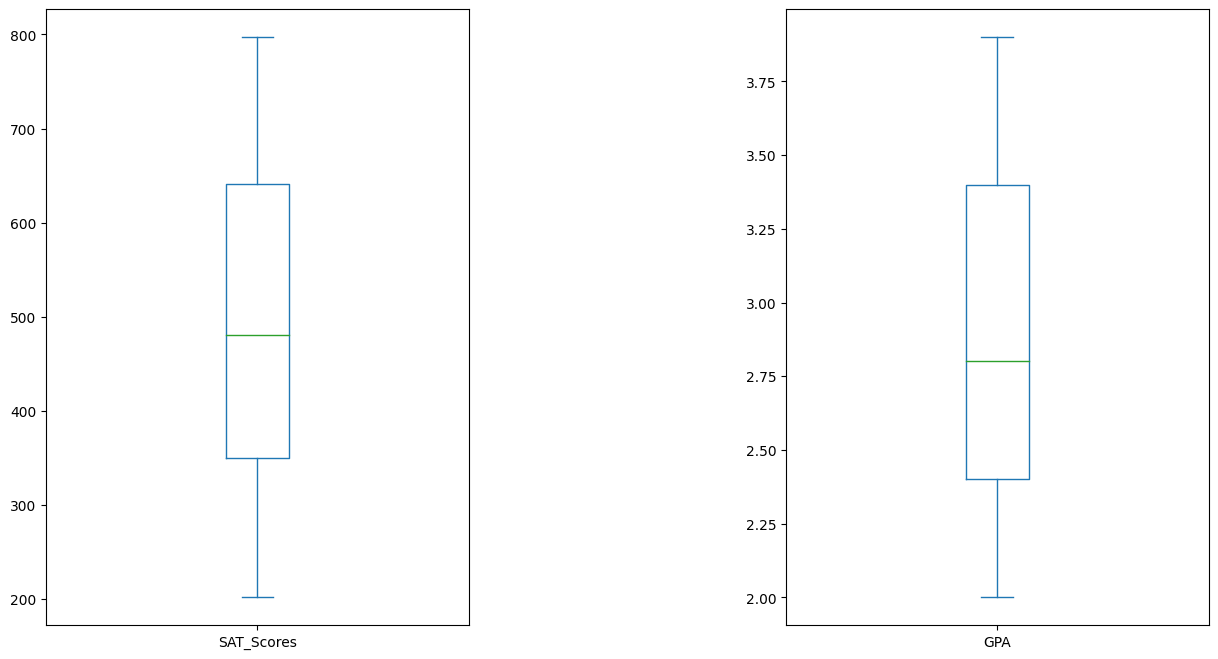

In [332]:
#checking for outliers
st.plot(kind='box',subplots=True,sharey=False,figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

<BarContainer object of 200 artists>

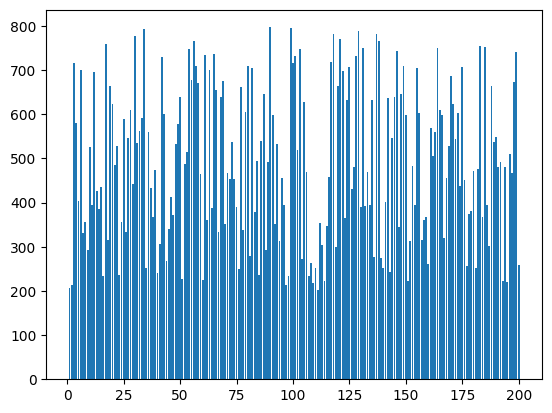

In [340]:
#barplot
plt.bar(height = st.SAT_Scores, x=np.arange(1,201,1))

(array([26., 17., 21., 19., 24., 17., 17., 20., 20., 19.]),
 array([202. , 261.5, 321. , 380.5, 440. , 499.5, 559. , 618.5, 678. ,
        737.5, 797. ]),
 <BarContainer object of 10 artists>)

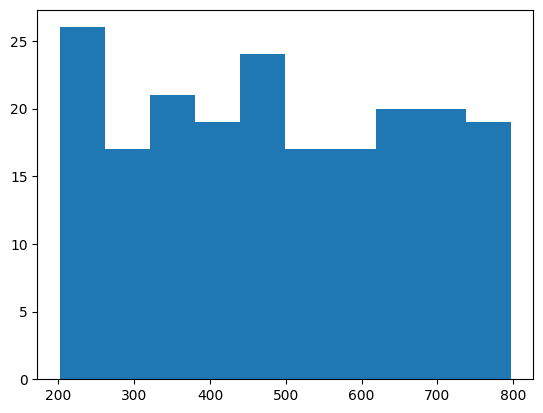

In [341]:
#histogram
plt.hist(st.SAT_Scores)

<BarContainer object of 200 artists>

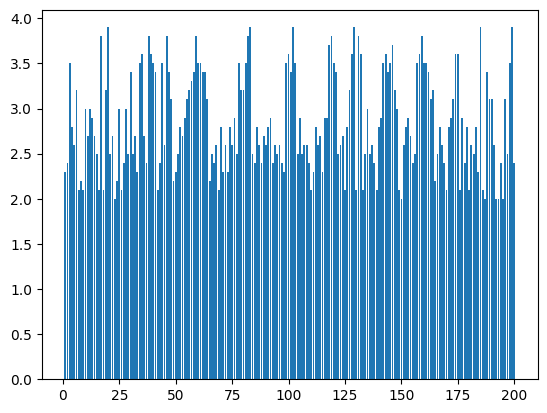

In [342]:
#barplot
plt.bar(height=st.GPA, x=np.arange(1,201,1))

(array([23., 14., 34., 28., 25., 14.,  9., 28., 11., 14.]),
 array([2.  , 2.19, 2.38, 2.57, 2.76, 2.95, 3.14, 3.33, 3.52, 3.71, 3.9 ]),
 <BarContainer object of 10 artists>)

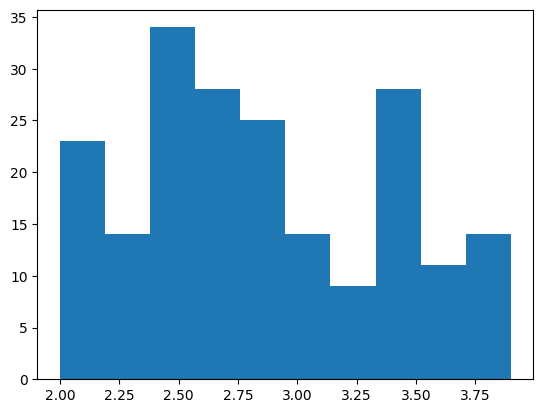

In [343]:
#histogram
plt.hist(st.GPA)

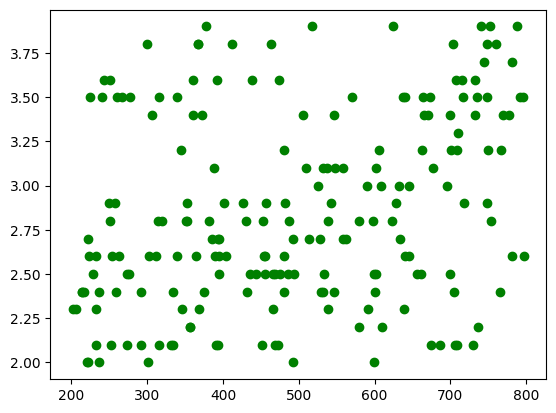

In [344]:
#scatter plot
plt.scatter(x=st.SAT_Scores,y=st.GPA, color='green')

In [345]:
#correlation
np.corrcoef(st.SAT_Scores,st.GPA)

array([[1.        , 0.29353828],
       [0.29353828, 1.        ]])

In [347]:
#covariance
cov_output = np.cov(st.SAT_Scores,st.GPA)[0,1]
cov_output

27.77779396984924

<AxesSubplot: >

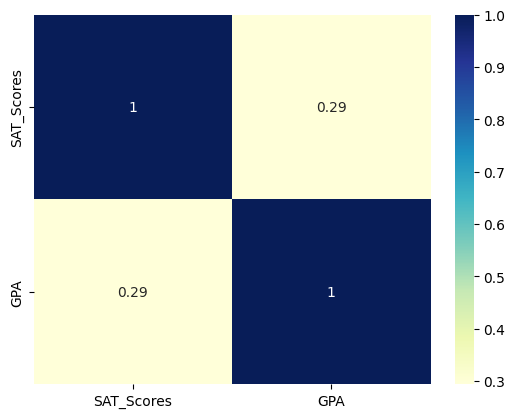

In [348]:
sns.heatmap(st.corr(), annot=True, cmap='YlGnBu')

In [349]:
#linear regression using stats model package
import statsmodels.formula.api as smf

In [351]:
model1 = smf.ols('GPA ~ SAT_Scores', data=st).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           2.46e-05
Time:                        13:18:08   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.000       2.187       2.619
SAT_Scores     0.0009      0.000      4.321      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.558
Skew:                           0.317   Prob(JB):                       0.0228
Kurtosis:                       2.290   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [352]:
pred1 = model1.predict(pd.DataFrame(st.SAT_Scores))
pred1

0      2.589947
1      2.597212
2      3.054002
3      2.929588
4      2.769757
         ...   
195    2.865111
196    2.826061
197    3.014044
198    3.075797
199    2.638078
Length: 200, dtype: float64

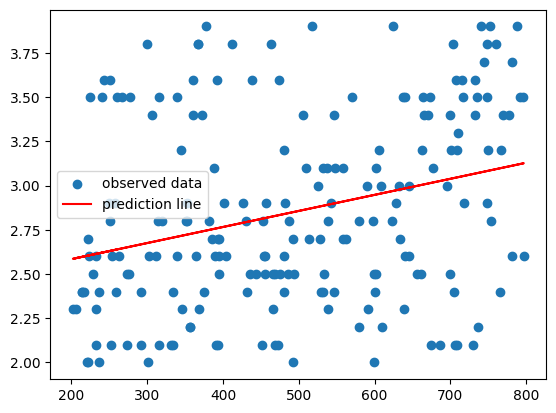

In [354]:
plt.scatter(st.SAT_Scores,st.GPA)
plt.plot(st.SAT_Scores, pred1, 'r')
plt.legend(['observed data', 'prediction line'])
plt.show()

In [355]:
#Error Values
res1 = st.GPA - pred1
res_sqr1 = res1*res1
mse1 = np.mean(res_sqr1)
rmse1=np.sqrt(mse1)
rmse1

0.5159457227723684

array([[1.        , 0.27771976],
       [0.27771976, 1.        ]])

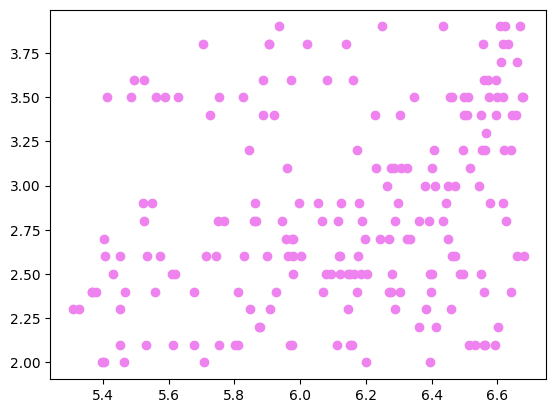

In [357]:
#log transformation
#x=log(X), y=Y
plt.scatter(x=np.log(st.SAT_Scores),y=st.GPA, color="violet")
np.corrcoef(np.log(st.SAT_Scores),st.GPA)

In [370]:
model2 =smf.ols('GPA ~ np.log(SAT_Scores)',data=st).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     16.55
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           6.85e-05
Time:                        14:26:18   Log-Likelihood:                -152.42
No. Observations:                 200   AIC:                             308.8
Df Residuals:                     198   BIC:                             315.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4796      0.584      0.822      0.412      -0.672       1.631
np.log(SAT_Scores)     0.3868      0.095      4.068      0.000       0.199       0.574
==============================================================================
Omnibus:                       15.866   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.435
Skew:                           0.320   Prob(JB):                       0.0147
Kurtosis:                       2.224   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
pred2 = model2.predict(pd.DataFrame(st.SAT_Scores))
pred2

0      2.540157
1      2.554892
2      3.022514
3      2.940504
4      2.800650
         ...   
195    2.890002
196    2.855867
197    2.998021
198    3.035248
199    2.628705
Length: 200, dtype: float64

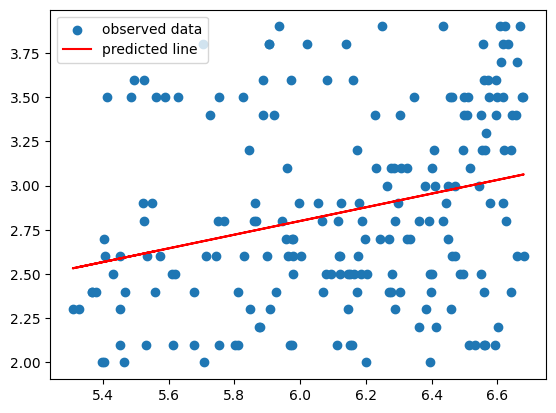

In [372]:
#regression line
plt.scatter(np.log(st.SAT_Scores), st.GPA)
plt.plot(np.log(st.SAT_Scores), pred2, 'r')
plt.legend(['observed data', 'predicted line'])
plt.show()

In [374]:
#error value
res2 = st.GPA - pred2
res_sqr2 = res2*res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

0.518490410108067

array([[1.        , 0.29408419],
       [0.29408419, 1.        ]])

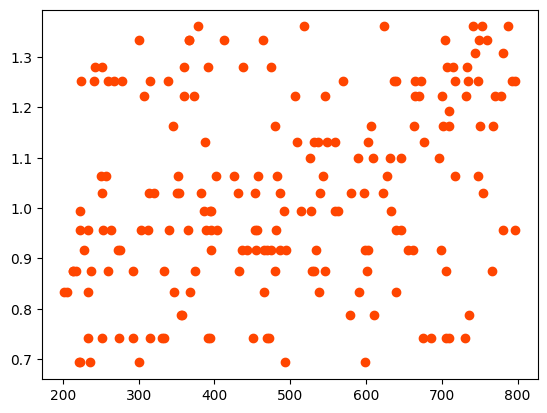

In [376]:
#exponential transformation
#x=x,y=log(y)
plt.scatter(x= st.SAT_Scores, y= np.log(st.GPA), color='orangered')
np.corrcoef(st.SAT_Scores,np.log(st.GPA))

In [381]:
model3 = smf.ols('np.log(GPA) ~ SAT_Scores',data=st).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.75
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           2.37e-05
Time:                        14:38:16   Log-Likelihood:                 58.615
No. Observations:                 200   AIC:                            -113.2
Df Residuals:                     198   BIC:                            -106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8727      0.038     22.745      0.000       0.797       0.948
SAT_Scores     0.0003   7.35e-05      4.330      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.046   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.816
Skew:                           0.066   Prob(JB):                       0.0900
Kurtosis:                       2.251   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [384]:
pred3 = model3.predict(pd.DataFrame(st.SAT_Scores))
pred3_at = np.exp(pred3)
pred3_at

0      2.555671
1      2.562188
2      3.007152
3      2.878816
4      2.721951
         ...   
195    2.814476
196    2.776210
197    2.965323
198    3.030217
199    2.599158
Length: 200, dtype: float64

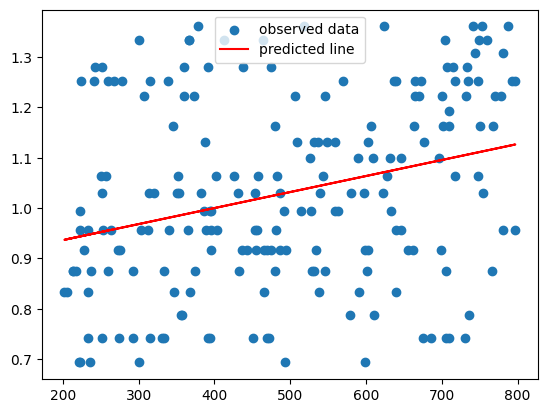

In [385]:
plt.scatter(st.SAT_Scores, np.log(st.GPA))
plt.plot(st.SAT_Scores, pred3, 'r')
plt.legend(['observed data','predicted line'])
plt.show()

In [387]:
#error value 
res3 = st.GPA - pred3_at
res_sqr3 = res3*res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

0.5175875893834133

In [388]:
st = st.sort_values(['SAT_Scores'])
st

,SAT_Scores,GPA
110,202,2.3
0,206,2.3
1,214,2.4
96,214,2.4
108,217,2.4
...,...,...
117,781,3.7
128,788,3.9
33,792,3.5
98,796,3.5


In [389]:
#polynomial regression
model4 = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores * SAT_Scores)', data=st).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.23
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           5.95e-05
Time:                        14:46:23   Log-Likelihood:                 59.448
No. Observations:                 200   AIC:                            -112.9
Df Residuals:                     197   BIC:                            -103.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.0056      0.110      9.112      0.000       0.788       1.223
SAT_Scores                    -0.0003      0.000     -0.607      0.545      -0.001       0.001
I(SAT_Scores * SAT_Scores)  6.142e-07   4.79e-07      1.284      0.201    -3.3e-07    1.56e-06
==============================================================================
Omnibus:                        8.598   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.118
Skew:                           0.046   Prob(JB):                        0.128
Kurtosis:                       2.303   Cond. No.                     2.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [390]:
pred4 = model4.predict(pd.DataFrame(st))
pred4_at = np.exp(pred4)
pred4_at

110    2.642382
0      2.641946
1      2.641231
96     2.641231
108    2.641016
         ...   
117    3.165469
128    3.180392
33     3.189037
98     3.197769
89     3.199965
Length: 200, dtype: float64

In [391]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x=st.iloc[:, 0:1].values
x_poly = poly_reg.fit_transform(x)
x_poly

array([[1.00000e+00, 2.02000e+02, 4.08040e+04],
       [1.00000e+00, 2.06000e+02, 4.24360e+04],
       [1.00000e+00, 2.14000e+02, 4.57960e+04],
       [1.00000e+00, 2.14000e+02, 4.57960e+04],
       [1.00000e+00, 2.17000e+02, 4.70890e+04],
       [1.00000e+00, 2.21000e+02, 4.88410e+04],
       [1.00000e+00, 2.22000e+02, 4.92840e+04],
       [1.00000e+00, 2.22000e+02, 4.92840e+04],
       [1.00000e+00, 2.23000e+02, 4.97290e+04],
       [1.00000e+00, 2.24000e+02, 5.01760e+04],
       [1.00000e+00, 2.28000e+02, 5.19840e+04],
       [1.00000e+00, 2.33000e+02, 5.42890e+04],
       [1.00000e+00, 2.33000e+02, 5.42890e+04],
       [1.00000e+00, 2.33000e+02, 5.42890e+04],
       [1.00000e+00, 2.36000e+02, 5.56960e+04],
       [1.00000e+00, 2.37000e+02, 5.61690e+04],
       [1.00000e+00, 2.41000e+02, 5.80810e+04],
       [1.00000e+00, 2.43000e+02, 5.90490e+04],
       [1.00000e+00, 2.50000e+02, 6.25000e+04],
       [1.00000e+00, 2.51000e+02, 6.30010e+04],
       [1.00000e+00, 2.51000e+02, 6.3001

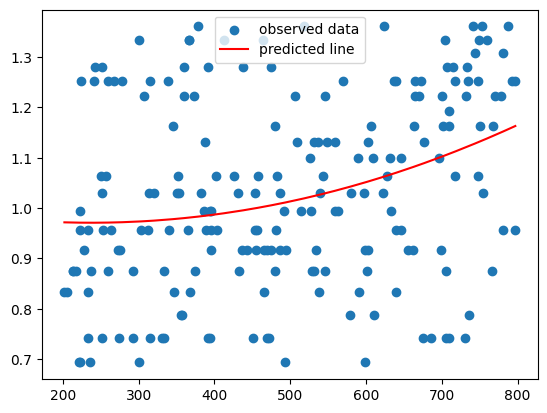

In [392]:
#regression line
plt.scatter(st.SAT_Scores, np.log(st.GPA))
plt.plot(x, pred4, 'r')
plt.legend(['observed data','predicted line'])
plt.show()

In [393]:
#error value
res4 = st.GPA - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

0.514491248774527

In [394]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse               #Polynomial model 0.514491 gives least error

,MODEL,RMSE
0,SLR,0.515946
1,Log model,0.518490
2,Exp model,0.517588
3,Poly model,0.514491


In [400]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(st,test_size=0.2, random_state=0)

In [401]:
final_model = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores * SAT_Scores)', data=train).fit()
final_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7.333
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           0.000903
Time:                        15:15:11   Log-Likelihood:                 49.048
No. Observations:                 160   AIC:                            -92.10
Df Residuals:                     157   BIC:                            -82.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.0612      0.124      8.584      0.000       0.817       1.305
SAT_Scores                    -0.0005      0.001     -0.933      0.352      -0.002       0.001
I(SAT_Scores * SAT_Scores)  7.909e-07   5.29e-07      1.495      0.137   -2.54e-07    1.84e-06
==============================================================================
Omnibus:                        5.845   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.266
Skew:                           0.115   Prob(JB):                        0.195
Kurtosis:                       2.339   Cond. No.                     2.80e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [402]:
test_pred =final_model.predict(pd.DataFrame(test))
pred_test_GPA = np.exp(test_pred)
pred_test_GPA

75     2.680476
148    3.019984
161    2.749462
126    2.729435
100    3.064841
145    3.089534
194    2.690301
141    2.899407
97     2.685798
65     2.928417
46     2.678521
162    2.799999
64     3.072972
18     2.939601
36     2.700421
192    2.689902
8      2.672607
24     2.835823
40     2.671609
153    2.684937
102    3.097966
123    2.893546
25     2.672208
68     2.959406
183    2.677351
189    2.788415
60     3.070930
130    3.100090
26     2.786372
66     2.672208
39     2.683139
157    2.675699
86     2.912905
9      2.766980
180    2.679665
16     3.123875
3      2.823748
108    2.691940
28     2.706171
83     2.739836
dtype: float64

In [403]:
test_res = test.GPA - pred_test_GPA
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

0.5198819904532657

In [404]:
train_pred = final_model.predict(pd.DataFrame(train))
pred_train_GPA = np.exp(train_pred)
pred_train_GPA

165    2.847119
63     2.682671
107    2.677240
168    2.769768
124    3.014368
         ...   
74     2.682982
120    3.146179
188    2.777411
44     2.672759
56     3.021868
Length: 160, dtype: float64

In [405]:
# Model Evaluation on train data
train_res = train.GPA - pred_train_GPA
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

0.5127900598193432